In [ ]:
import numpy as np
import pandas as pd # Data Manipulation, Data Cleaning, Data Exploration, Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("/content/Housing (1).csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
maxvalue=df.max()
print(maxvalue)

price                  13300000
area                      16200
bedrooms                      6
bathrooms                     4
stories                       4
mainroad                    yes
guestroom                   yes
basement                    yes
hotwaterheating             yes
airconditioning             yes
parking                       3
prefarea                    yes
furnishingstatus    unfurnished
dtype: object


In [ ]:
df.mainroad.replace(to_replace=['yes','no'],value=[1,0], inplace=True)
df.guestroom.replace(to_replace=['yes', 'no'], value=[1,0], inplace=True)
df.basement.replace(to_replace=['yes','no'],value=[1,0], inplace=True)
df.hotwaterheating.replace(to_replace=['yes', 'no'], value=[1,0], inplace=True)
df.airconditioning.replace(to_replace=['yes','no'],value=[1,0], inplace=True)
df.parking.replace(to_replace=['yes', 'no'], value=[1,0], inplace=True)
df.prefarea.replace(to_replace=['yes','no'],value=[1,0], inplace=True)
df.furnishingstatus.replace(to_replace=['furnished', 'semi-furnished','unfurnished'], value=[1,0.5,0], inplace=True)

In [ ]:
f_var_list = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
              'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
              'parking', 'prefarea','furnishingstatus']
x = df[f_var_list]

y = df['price']

Text(0, 0.5, 'price')

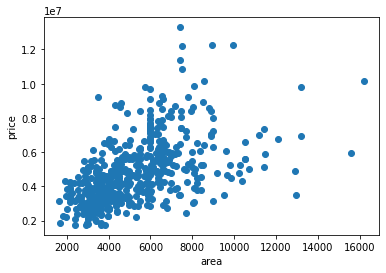

In [ ]:
plt.scatter(df.area, df.price)
plt.xlabel('area')
plt.ylabel('price')

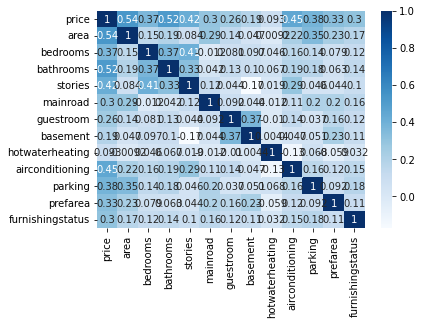

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
y_train_reshaped = y_train.values.reshape(-1,1)
y_test_reshaped = y_test.values.reshape(-1,1)

model = LinearRegression()
model.fit(x_train, y_train_reshaped)

slope = model.coef_

print('Feature coefficients :-')
for i in range(len(f_var_list)):
  print(f_var_list[i], slope[0][i], sep='\n')

Feature coefficients :-
area
235.84877178813662
bedrooms
78574.4923876014
bathrooms
1097117.2661479574
stories
406223.1644628831
mainroad
366824.19239248236
guestroom
233146.7656265501
basement
393159.7787258409
hotwaterheating
687881.3109570161
airconditioning
785550.5792954292
parking
225756.5139762822
prefarea
629901.6608459121
furnishingstatus
420794.2365431114


In [ ]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [ ]:
print("For Train set:-")
print(f"R-squared: {r2_score(y_train_reshaped, y_train_pred)}")
print("For Test set:-")      
print(f"R-squared: {r2_score(y_test_reshaped, y_test_pred):}")


For Train set:-
R-squared: 0.6854429472843788
For Test set:-
R-squared: 0.6494754192267804


In [ ]:
model.predict([[8000,4,2,3,1,0,0,0,1,2,1,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[7720070.46263401]])